<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2023/2024</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 5 - Decision Trees and Feature Extraction</center></b></h2>
    <h4><i><b><center>Human Activity Recognition with Decision Trees</center></b></i></h4></td></tr>
</table>

## 1. Human Activity Recognition

Within the ML world, one common task is to predict different activities performed by humans, such as walking, running or standing. 

Since such activities change continuously, it is necessary to consider data collected throughout time, so one can predict the performed activity at any given moment. For this purpose, __time series__ are sets of temporal information collected by different sensors.

Movement sensors like the accelererometer are useful for the Human Activity Recognition (HAR) complext task. However, as models are not inherently prepared to process time series data, an additional step is necessary to include in the ML pipeline: __Feature Extraction__.

### 1.1. The _UCI Human Activity Recognition Using Smartphones Data Set_

Let's use a well-known HAR dataset from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions):

_The experiments were carried out with a group of __30 volunteers__ within an age bracket of 19-48 years. They performed a protocol of activities composed of __six basic activities: three static postures (standing, sitting, lying) and three dynamic activities (walking, walking downstairs and walking upstairs)__. The experiment also included postural transitions that occurred between the static postures. These are: stand-to-sit, sit-to-stand, sit-to-lie, lie-to-sit, stand-to-lie, and lie-to-stand. All the participants were wearing a smartphone (Samsung Galaxy S II) on the waist during the experiment execution. We captured __3-axial linear acceleration and 3-axial angular velocity__ at a constant rate of __50Hz__ using the embedded accelerometer and gyroscope of the device. The experiments were video-recorded to label the data manually. The obtained dataset was randomly partitioned into two sets, where __70% of the volunteers was selected for generating the training data and 30% the test data__._

In this notebook, we will only use the X axis of the acceleration data.

In [ ]:
# %matplotlib notebook
# !pip install wget
import os
import wget
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sys import platform

In [ ]:
# Download dataset from UCI repo
if not os.path.exists("Data/UCI HAR Dataset.zip"):
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI HAR Dataset.zip'
    wget.download(url, out="Data/UCI HAR Dataset.zip")

# Unzip dataset
zip_ref = zipfile.ZipFile("Data/UCI HAR Dataset.zip", 'r')
zip_ref.extractall("Data")
zip_ref.close()

The method `get_inertial_data()` performs the loading of one acceleration axis, including the original raw data and the corresponding labels. Furthermore, the id of the subject that performed the activity is also loaded.

In [ ]:
# AUXILIAR FUNCTION
def get_inertial_data(acc_axis):
    
    # Load train data
    X_train = np.loadtxt('Data/UCI HAR Dataset/train/Inertial Signals/total_'+ acc_axis +'_train.txt')
    X_train = np.hstack([wind[:64] for wind in X_train])
    y_train = np.loadtxt('Data/UCI HAR Dataset/train/y_train.txt', dtype=int)
    y_train = np.repeat(y_train, 64)
    subject_train = np.loadtxt('Data/UCI HAR Dataset/train/subject_train.txt', dtype=int)
    subject_train = np.repeat(subject_train, 64)
    
    # Load test data
    X_test = np.loadtxt('Data/UCI HAR Dataset/test/Inertial Signals/total_'+ acc_axis +'_test.txt')
    X_test = np.hstack([wind[:64] for wind in X_test])
    y_test = np.loadtxt('Data/UCI HAR Dataset/test/y_test.txt', dtype=int)
    y_test = np.repeat(y_test, 64)
    subject_test = np.loadtxt('Data/UCI HAR Dataset/test/subject_test.txt', dtype=int)
    subject_test = np.repeat(subject_test, 64)
    
    # Load activity labels
    activity_labels = pd.read_csv('Data/UCI HAR Dataset/activity_labels.txt', index_col=0, header=None, sep=' ')
    
    return X_train, y_train, subject_train, X_test, y_test, subject_test, np.hstack(activity_labels.values)

In [ ]:
train_data, train_labels, subject_train, test_data, test_labels, subject_test, activity_labels = get_inertial_data('acc_x')

print("ACC train data shape: {} | target shape: {} | Subjects: {}".format(train_data.shape, train_labels.shape,np.unique(subject_train).size))
print("ACC test  data shape: {} | target shape: {} | Subjects: {}".format(test_data.shape, test_labels.shape, np.unique(subject_test).size))
print("Available Activities:\n{}".format(activity_labels))

Let's looks at the full data of one subject. Plot accelerometer data and add vertical lines in the transitons of the activities. 

In [ ]:
subject = 1

signal = train_data[subject_train == subject]
idx_transitions = np.where(np.diff(train_labels[subject_train == subject]) != 0)[0]

plt.figure()
plt.title("Acceleration Data from Subject {}".format(subject))
plt.plot(signal)
plt.vlines(idx_transitions , -.5, 2, color='orange');

Now, it is important to verify if our data is balanced, as it may present problems.

In [ ]:
plt.figure()
plt.title("Distribution of Classification Samples")
plt.hist(train_labels, range=[1,7], bins=6, width=0.8)
plt.xticks(np.arange(1,7), activity_labels, rotation=45)
plt.tight_layout()

## 2. Feature Extraction

Models need to learn from useful characteristics from each data sample, i.e. window. For that purpose, it is necessary to extract features from the signals.

From the above plot we can see that there are significant differences in the amplitude of each activity. For a classification task we may want to provide a classification every `x` seconds. Using the previous signals we can calculate some features such as `np.mean()`, `np.max()` and `np.min` for every `5` seconds and evaluate if it enough to distinguish our classes.

__Exercise 2.1__: Define a function to divide the accelerometer data (and labels) into windows of `5 seconds`.

If in the same window we have more than one class, what should we do? Define a strategy and justify them.

Expected size: 

`train_windows` - `[n_windows, window_size]`

`y_train` - `[n_windows]`

In [ ]:
sampling_frequency = 50

# define window size
window_size = 

def window_splitter(train_data, train_labels, window_size):
    
    # TODO
    
    return train_windows, y_train

__Exercise 2.2__: Implement a function to calculate statistical features. The ouput should be an array of shape `X_train` - `[n_windows, n_features]`.

In [ ]:
def compute_statistical_features(windows):
    
    # TODO
    
    return X_train

__Exercise: 2.3__: Use the previous functions to split the data and extract the features.

## 3. Training a Decision Tree Classifier

Using sklearn package train a Decision Tree ([`DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) using the statistical features we extracted from the data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

__Exercise 3.1:__ Train the classifier and check its performance using accuracy in both train and test sets.

In [ ]:


print('Train Accuracy: %.3f ' % acc_train)
print('Test Accuracy : %.3f' % acc_test)

From the results, we can clearly assert that our model is __overfitted__ to the training data. 

As we let the learning process run with default values, the model converged into a perfect solution in the train set through a overly complex tree. This tree cannot generalize well to the test set.

Use `plot_tree` from sklearn to visualized the complex decision tree obtained.

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(clf, filled=True)
plt.show()

<div class="alert alert-block alert-info">

# Avoiding Overfitting

> Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting.
    
## Prepruning a tree

The splitter <br>
The maximum depth<br>
The minimum number of samples required to split<br>
The minimum samples in each leaf<br>
The minimum weight fraction in each leaf<br>
The maximum number of features]<br>
The maximum number of leaf nodes<br>
The minimum impurity decrease<br>
</div>

To avoid overfitting, it is necessary to adjust the model hyperparameters, to impose some limitations to the training process. 

As it is not possible to test all combinations by hand, it is useful to resort to additional optimization techniques (we will learn about optimization techniques in the next lab class).

__Exercise 3.2__: For now try to use a maximum depth of 5 and compare again the accuracy score and visualize the tree. 

In [ ]:


print('Train Accuracy: %.3f ' % acc_train)
print('Test Accuracy : %.3f' % acc_test)

In [ ]:
plt.figure(figsize=(10,5))
plot_tree(model, filled=True)
plt.show()

__Exercise 3.4:__ Plot the confusion matrix to understand the misclassifications of our model.

## 4. Automatic Feature Extraction with TSFEL

Another method to extract useful information from data is to leverage automatic feature extraction tools, which can compute in an efficient way more informative representations of our data.

For time series data, the Time Series Feature Extraction Library ([TSFEL](https://tsfel.readthedocs.io/en/latest/)) is able to extract features from the temporal, statistical and spectral domains. 

We will try this tool in the Human Activity Recognition Dataset, but first we need to install it. Run on your terminal:

`pip install tsfel`

Let's see how it works. The computation process takes some time, TSFEL will extract 259 features. 

In [ ]:
import tsfel

cfg = tsfel.get_features_by_domain()

X_train_tsfel = tsfel.time_series_features_extractor(cfg, train_windows, fs=50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg, test_windows, fs=50)

In [ ]:
X_train_tsfel.head()

__Excercise 4.1__: Fit the model again with the new feature vector and calculate the accuracy score for both sets.

In [ ]:


print('Train Accuracy: %.3f ' % acc_train)
print('Test Accuracy : %.3f' % acc_test)

Adding more features increase our accuracy! But now we have `250` features instead of `3`. 

With this high number of features we can apply feature selection methods and increase again our accuracy. In the next lab we will learn about feature selection methods.

# Decision Tree Models

Decision Tree is one of the most widely used ML algorithms. In this method, the learning function that maps a set of variables into the target is represented by a decision tree. Such trees can also be represented as sets of if-then rules for human readability.

<div>
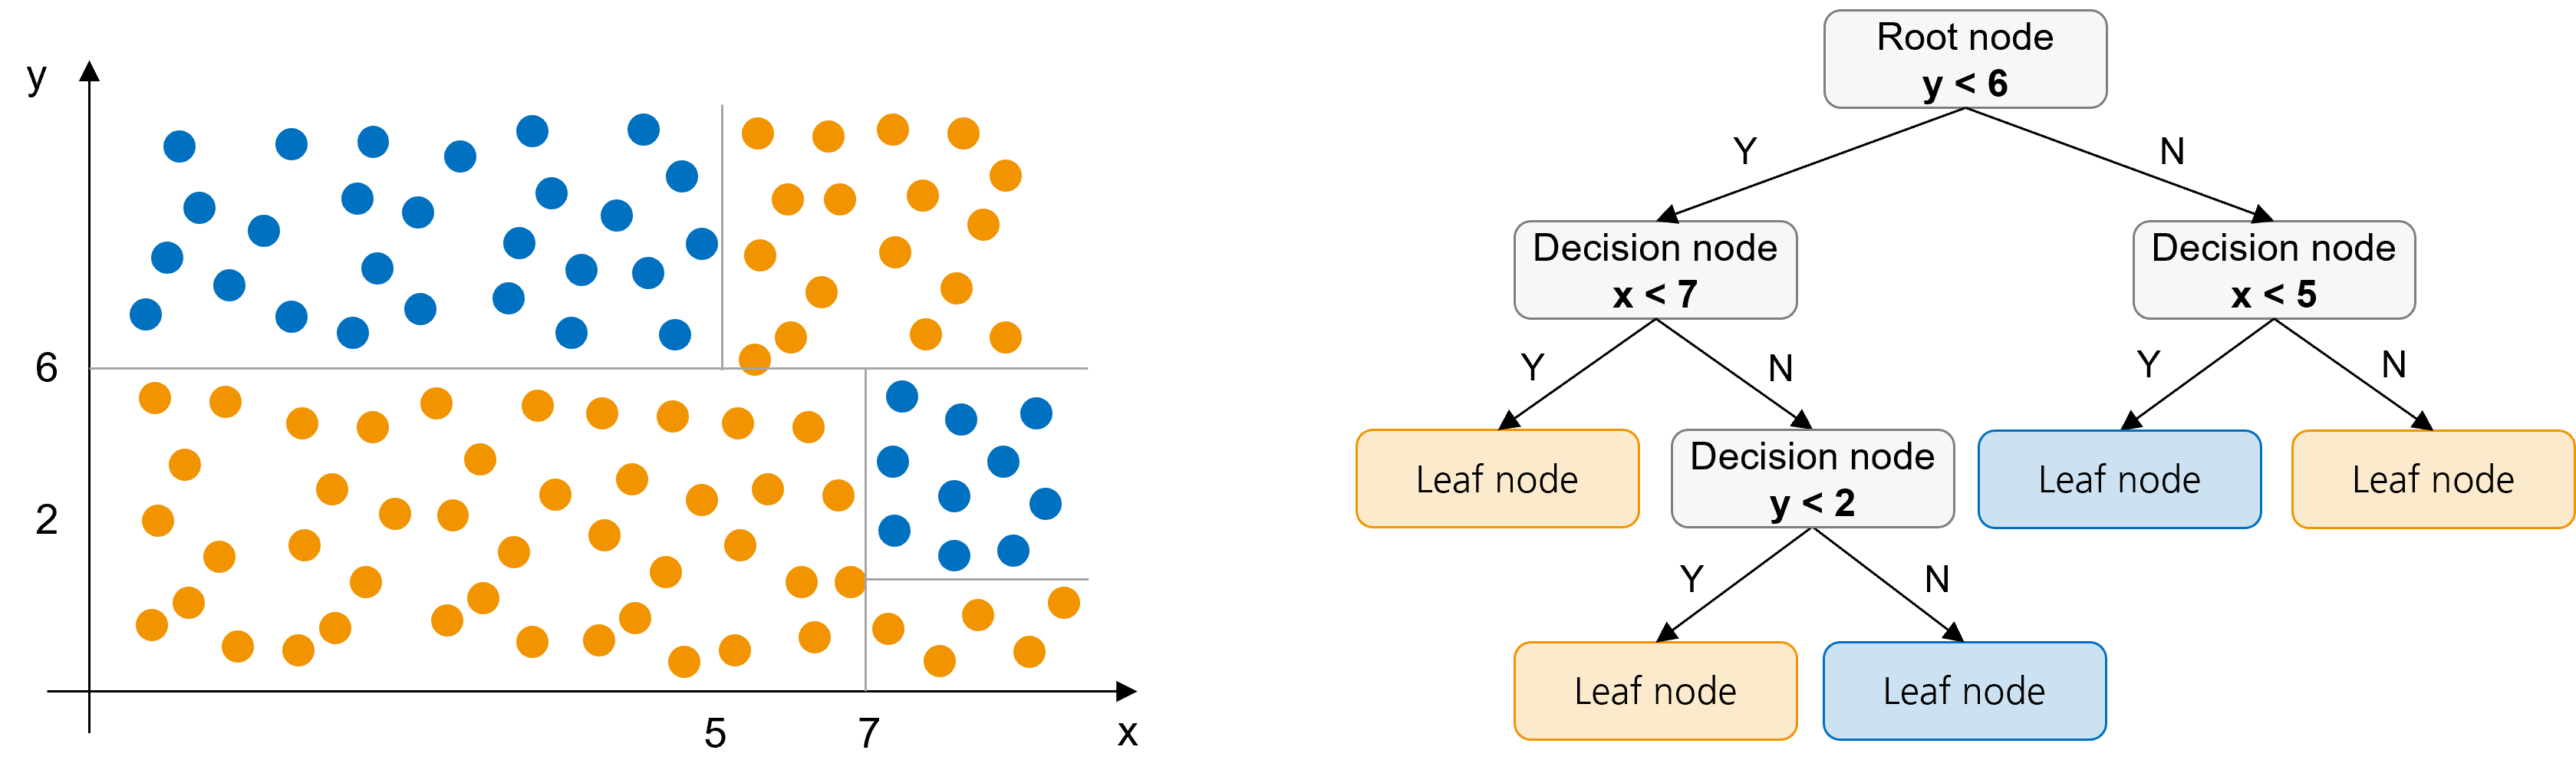
</div>

When looking at a decision tree, there are some important concepts to take into consideration:

* __Root node__: The top node of a decision tree from which all node splits come from. It represents the entire population.

* __Decision nodes__: These are nodes which are subdivided into new branches. Similarly, __parent nodes__ are those divided into sub-nodes, and these are called the __child nodes__.

* __Leaf or Terminal nodes__: Includes all nodes that are not further subdivided, thus representing the predicted class.

Decision Trees therefore classify samples by sorting them down from the root of the tree up to some leaf node, providing the final classification. Each node evaluates a specific attribute, which then divides the samples according to an optimized condition.

These models were originally developed for classification, although variations exist for the regression task. By dividing the multidimensional space into sections, these models are quite robust to outliers.

### Optimizing Decision Trees

Training a decision tree is an iterative process towards an optimized solution. In simple terms, at each iteration, every data feature is tested to assert which is the most useful to classify the examples.

At every decision node, all features are tested, to select how the new branches will be created. The training continues using the training examples associated with each child node. The algorithm converges when no more samples are left to split, or when some stopping criteria is met.

##### Entropy

One of the most common concepts related to the selection of decision features is _Entropy_. This measure characterizes the impurity of an arbitrary collection of examples, namely the set of samples available in some node. 

Entropy thus describes the purity of a node. The lower the value of entropy, the higher the node's purity. An homogeneous node has an entropy of 0. Therefore, the training process will create new subdivisions to lower the impurity of the system.

The entropy of a set of samples can be computed by the following equation:

$$ \text{Entropy} = - \sum_{i=1}{p_i . \log_2{p_i}} $$

where $p_i$ is the probability of each class $i$ within the samples of the decision node. Entropy will be 1 when dealing with a binary classification problem the training set contains an equal proportion of both values, i.e. $p_i=0.5$. If all examples are from the same class, then the entropy will be 0.

The training process that uses entropy as a splitting strategy is called __Information Gain__, which is determined by:

$$ \text{Information Gain} = 1 - \text{Entropy}$$

The variable selection process will then exhaustively test the Information Gain brought by each feature.

##### Gini Impurity

Another strategy often used is the Gini Impurity, which leverages the Gini concept. It translates the probability of correctly labeling a randomly chosen element if it was randomly labeled according to the distribution of labels in the node. It can be determined by:

$$ \text{Gini} = \sum_{i=1}{p_i^2} $$

Therefore, the Gini Impurity is determined by:

$$ \text{Gini Impurity} = 1 - \text{Gini}$$